5.1 T-Value of Linear Trend

In [4]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

def get_t_val_linear(close:pd.Series):
    x=np.ones((len(close), 2))
    x[:, 1]=np.arange(len(close))
    ols=sm.OLS(close, x).fit()
    return ols.tvalues[1]

5.2 Implementiation of The Trend-Scanning Method

In [5]:
from typing import List

def get_bins_from_trend(module:pd.Index, close:pd.Series, span_list:List):
    '''
    linear trend로 부터 t-value의 sign을 구한다. 
    '''
    ret=pd.DataFrame(index=module, columns=['t1', 't_val', 'bin'])
    for cur_index in module:
        t_vals=pd.Series()
        start_iloc=close.index.get_loc(cur_index)
        if start_iloc+max(span_list) >= len(close):
            continue
        for span in span_list:
            span_close_end=close.index[start_iloc+span-1]
            span_close=close.loc[cur_index:span_close_end]
            t_vals.loc[span_close_end]=get_t_val_linear(span_close.values)
        max_abs_t_val_idx=t_vals.replace([-np.inf, np.inf, np.nan], 0).abs().idxmax()
        ret.loc[cur_index, ['t1', 't_val', 'bin']]=t_vals.index[-1], t_vals[max_abs_t_val_idx], np.sign(t_vals[max_abs_t_val_idx])
    ret['t1']=pd.to_datetime(ret['t1'])
    ret['bin']=pd.to_numeric(ret['bin'], downcast='signed')
    return ret.dropna(subset=['bin'])

5.3 Testing The Trend-Scanning Labeling Algorithm

/var/folders/4t/tqsscz0s6wn8sp8kh0264n680000gn/T/ipykernel_80649/2549088265.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


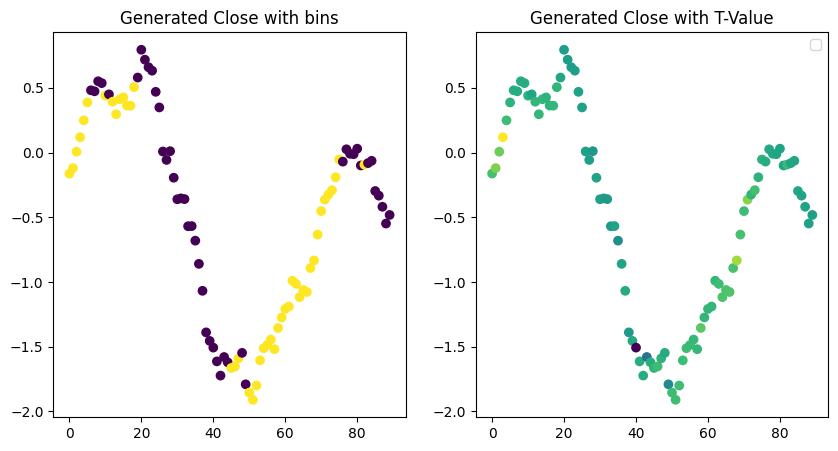

In [16]:
import matplotlib.pylab as plt

generated_close=pd.Series(np.random.normal(0, 0.1, 100)).cumsum()
generated_close+=np.sin(np.linspace(0, 10, generated_close.shape[0])) # add trend

ret=get_bins_from_trend(generated_close.index, generated_close, [3, 10, 1])

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# plt close
ax[0].scatter(ret.index, generated_close[ret.index].values, c=ret['bin'].values, cmap='viridis')
ax[0].set_title('Generated Close with bins')

# plt t-value
ax[1].scatter(ret.index, generated_close[ret.index].values, c=ret['t_val'].values, cmap='viridis')
ax[1].set_title('Generated Close with T-Value')
plt.legend()
plt.show()